<h1>Random Walk</h1>
<h3>Question : </h3>
<p>
    Suppose the following scenario :<br/>
    There are a student and a teacher.<br/>
    The student challenges the teacher to play a game with him and the final result of the game will be his final grade in the
    course that the teacher's teaching.<br/>
    The game consists of the following steps :<br/>
    <ol>
        <li>
            Rolling the dice.
        </li>
        <li>
            If the dice's top face is showing : <br/>
            <ul>
                <li>
                    1 or 2 : The student's grade goes down by 1 points.
                </li>
                <li>
                    3 or 5 : The student's grade goes up by 2 point.
                </li>
                <li>
                    4 or 6 : They roll the dice again to figure out by how many points the grade will be go up.
                </li>
            </ul>
        </li>
        <li>
            Repeating the above steps 80 times.
        </li>
    </ol>
    <b>Explain</b> the distribution of the final grade that the student can take.
</p>

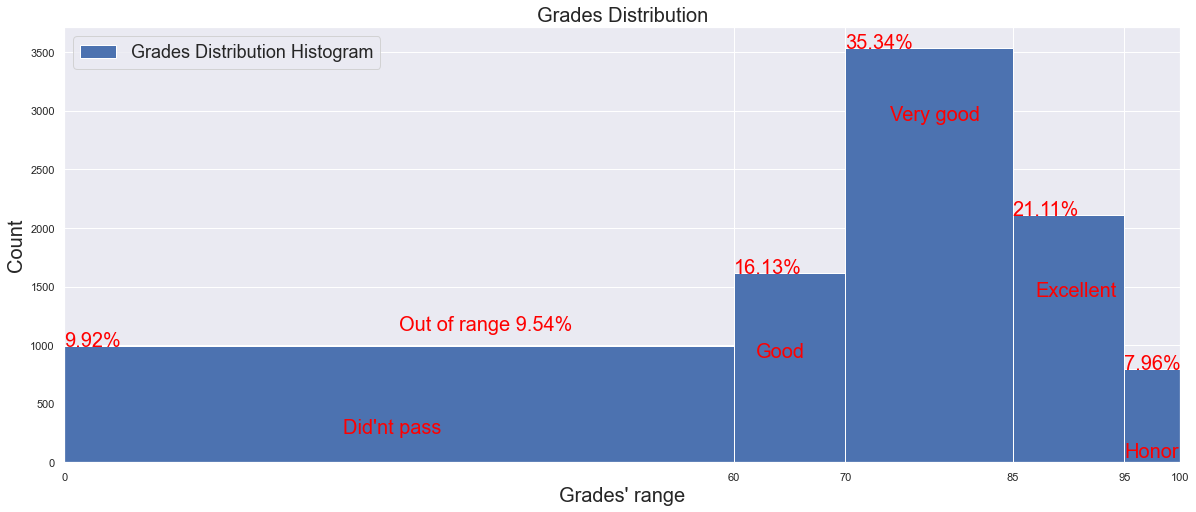

In [2]:
#Importing needed packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Set the style of plotting
sns.set(style = "darkgrid")

#List to store the final grade(The latest value of a random walk) - for each random walk.
final_grade = []

#The number of times the random walk will be calculated.
num_trails = 10000

for i in range(num_trails) :
    #The initail state - the challenge starts when the grade is zero.
    grades = [0]
    #For loop - to repeat the first 2 steps 100 times.
    for i in range(80) :
        #Rolling the dice.
        dice = np.random.randint(1,6)
        #According to the challenge : If the dice's top face is showing 1 or 2 then the student's grade goes down by 2 points.
        if(dice in [1,2]) :
            grades.append(grades[-1] - 1)
        #According to the challenge : If the dice's top face is showing 3 or 5 then the student's grade goes up by 1 point.
        elif(dice in [3,5]) :
            grades.append(grades[-1] + 2)
        #According to the challenge : If the dice's top face is showing 4 or 6 then they roll the dice again.
        else :
            #Rolling the dice again and figuring out by how many points the student's grade will go up.
            grade = np.random.randint(1,6)
            grades.append(grades[-1] + grade)
    #Storing the final grade - to use it later to explain the distribution.
    final_grade.append(grades[-1])
    
#Visualiing step.

#Bins' edges.
edges = [0,60,70,85,95,100]
#X-axis ticks.
x_ticks = [0,60,70,85,95,100]
#Used to shift the position of a class label in the plot.
position = [25,2,4,2,0]
#Class labels.
evaluation = ["Did'nt pass","Good","Very good","Excellent","Honor"]

#One way to determine figure's size.
plt.figure(figsize = (20,8))
#To avoid spaces in both edges.
plt.xlim(0,100)
#Histogram.
hist_var = plt.hist(final_grade,bins = edges,label = "Grades Distribution Histogram")
#Specify the title of the plot.
plt.title("Grades Distribution",fontsize = 20)
#Specify what x-axis is representing.
plt.xlabel("Grades' range",fontsize = 20)
#Specify what y-axis is representing.
plt.ylabel("Count",fontsize = 20)
#Customize the x-axis.
plt.xticks(x_ticks)
#Just a legend ^-^ .
plt.legend(fontsize = 18)
#Showing some explainations in the plot.
for x,y,index in zip([0,60,70,85,95,100],hist_var[0],range(len(hist_var[0]))) :
    plt.text(x,y,"{}%".format(np.round((y/num_trails)*100,2)),fontsize = 20,color = 'red')
    plt.text(x+position[index],y - min(hist_var[0]) + 0.05*y ,evaluation[index],fontsize = 20,color = 'red')
out_of_range = num_trails - sum(hist_var[0])
plt.text(30,hist_var[0][0] + min(hist_var[0])/6,"Out of range {}%".format(np.round((out_of_range/num_trails)*100,2)),fontsize = 20,color = 'red')
plt.show()

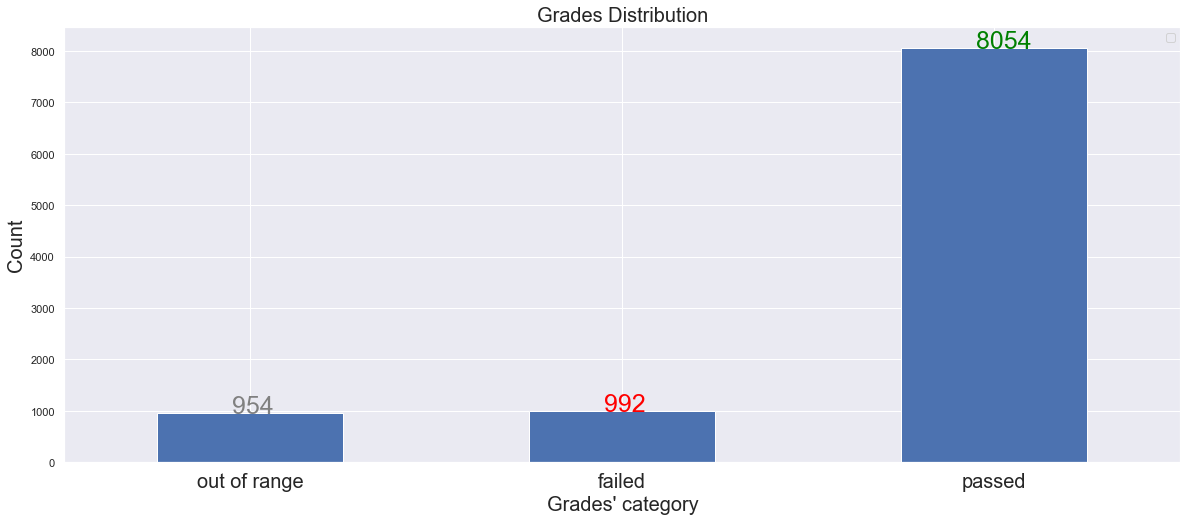

In [3]:
#Convert from list to numpy array to perform some operations more easily
distribution = np.array(final_grade)
#Computing some needed variables
passed = len(distribution[np.logical_and(distribution >=60,distribution<=100)])
failed = len(distribution[np.logical_and(distribution >=0,distribution<=59)])
out_of_range = len(distribution[np.logical_or(distribution >100,distribution<0)])

#Building a dataframe
dic = {"status" : ["out_of_range","failed","passed"] , "count" : [out_of_range,failed,passed]}
df = pd.DataFrame(dic)

#Visualization

#bar plot.
df.plot.bar(figsize = (20,8))
#Specify the title of the plot.
plt.title("Grades Distribution",fontsize = 20)
#Specify what x-axis is representing.
plt.xlabel("Grades' category",fontsize = 20)
#Specify what y-axis is representing.
plt.ylabel("Count",fontsize = 20)
#Just a legend ^-^ .
plt.legend("")
#list of colors 
colors = ["grey","red","green"]
#Some explainations
for index , value in enumerate(dic['count']) :
    plt.text(index - 0.05,value,"{}".format(value),fontsize = 25,color = colors[index])
#Customize the x-axis.
plt.xticks([0,1,2],['out of range','failed','passed'],fontsize = 20,rotation = 0)
plt.show()

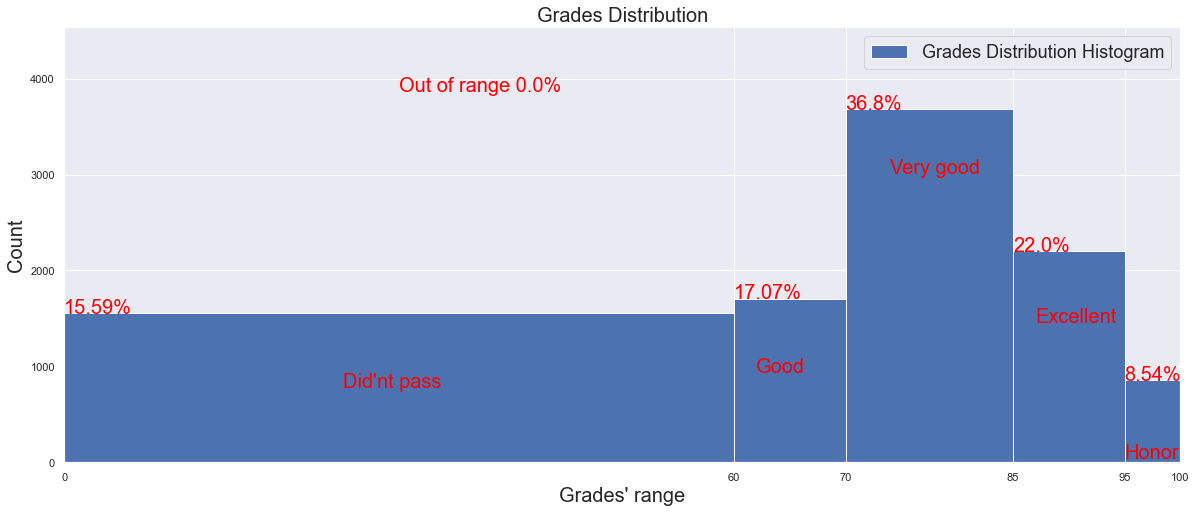

In [4]:
#One way to deal with out of range values
finals = [x if x>=0 and x<=100 else np.random.randint(0,101) for x in final_grade]

#One way to determine figure's size.
plt.figure(figsize = (20,8))
#To avoid spaces in both edges.
plt.xlim(0,100)
#Histogram.
hist_var = plt.hist(finals,bins = edges,label = "Grades Distribution Histogram")
#Specify the title of the plot.
plt.title("Grades Distribution",fontsize = 20)
#Specify what x-axis is representing.
plt.xlabel("Grades' range",fontsize = 20)
#Specify what y-axis is representing.
plt.ylabel("Count",fontsize = 20)
#Customize the x-axis.
plt.xticks(x_ticks)
#Just a legend ^-^ .
plt.legend(fontsize = 18)
#Showing some explainations in the plot.
for x,y,index in zip([0,60,70,85,95,100],hist_var[0],range(len(hist_var[0]))) :
    plt.text(x,y,"{}%".format(np.round((y/num_trails)*100,2)),fontsize = 20,color = 'red')
    plt.text(x+position[index],y - min(hist_var[0]) + 0.05*y ,evaluation[index],fontsize = 20,color = 'red')
out_of_range = num_trails - sum(hist_var[0])
plt.ylim(0,max(hist_var[0]) + min(hist_var[0]) )
plt.text(30,1.05*max(hist_var[0]),"Out of range {}%".format(np.round((out_of_range/num_trails)*100,2)),fontsize = 20,color = 'red')
plt.show()

<h1 class = "bg-danger text-success" style = "letter-spacing : 4px ; border : 1px red solid;line-height : 30px">
    As a result :The Student has more chances to win!
</h1>

<h2>06/12/2020</h2>